In [9]:
# Import our libraries 

# Pandas and numpy for data wrangling
import pandas as pd
import numpy as np

# Seaborn / matplotlib for visualization 
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
import seaborn as sns

# Helper function to split our data
from sklearn.model_selection import train_test_split

# This is our Logit model
from sklearn.linear_model import LogisticRegression

# Helper fuctions to evaluate our model.
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score


df = pd.read_csv('data/titanic.csv')
df.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Only using AGE and SEX as a feature

Optimization terminated successfully.
         Current function value: 0.509254
         Iterations 5
Accuracy Score: 0.753488
F1 Score: 0.690058
                           Logit Regression Results                           
Dep. Variable:               survived   No. Observations:                  499
Model:                          Logit   Df Residuals:                      496
Method:                           MLE   Df Model:                            2
Date:                Tue, 14 Oct 2025   Pseudo R-squ.:                  0.2446
Time:                        17:56:09   Log-Likelihood:                -254.12
converged:                       True   LL-Null:                       -336.39
Covariance Type:            nonrobust   LLR p-value:                 1.857e-36
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.5133      0.287      5.280      0.000       0.9

,const,age,sex_male,y_pred_proba,y_pred
149,1.0,42.0,1,0.179105,0
407,1.0,3.0,1,0.246270,0
53,1.0,29.0,0,0.770834,1
369,1.0,24.0,0,0.779851,1
818,1.0,43.0,1,0.177588,0
...,...,...,...,...,...
676,1.0,24.5,1,0.207309,0
493,1.0,71.0,1,0.139111,0
479,1.0,2.0,0,0.816467,1
278,1.0,7.0,1,0.238663,0


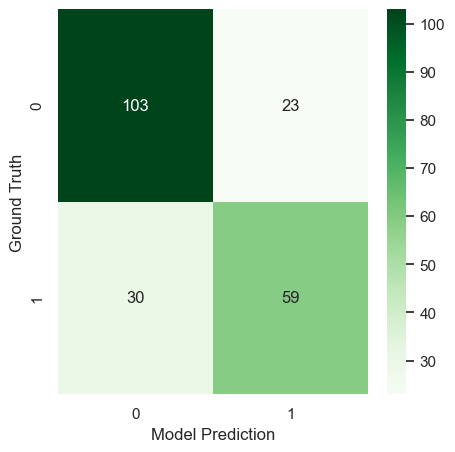

In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

# Load and Inspect
df = pd.read_csv('data/titanic.csv')

# Inspect, we did this in the previous lecture file. 

# Drop rows with missing target or missing important features
df.dropna(subset=['survived', 'age', 'fare'], inplace=True)

# Convert categorical variables to dummy variables (one-hot encoding)
df = pd.get_dummies(df, columns=['sex', 'pclass'], dtype=int, drop_first=True)


# Select and Engineer. 
features = ['age', 'sex_male']
target = 'survived'

# Define Features and Target
X = df[features]  
y = df[target]


# Split the Dataset into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# # Adding a constant term for intercept 
X_train_sm = sm.add_constant(X_train)   


# Fit the Logistic Regression Model using Statsmodels
logit_model = sm.Logit(endog=y_train, exog=X_train_sm)
result = logit_model.fit()

# Make Predictions on the Test Set
X_test_sm = sm.add_constant(X_test)  # Adding constant to test data
y_pred_prob = result.predict(X_test_sm)  # Predicting probabilities
y_pred = np.where(y_pred_prob > 0.5, 1, 0)  # Convert probabilities to binary predictions (using 0.5 as threshold)

###################################### 
##################### EVALUATE 

# ACCURACY
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score: %f" % accuracy)

# F1 ACCURACY
f1 = f1_score(y_test, y_pred)
print("F1 Score: %f" % f1)


# CONFUSION MATRIX
cm = confusion_matrix(y_test, y_pred)
fig = plt.figure(figsize=(5,5))
ax = sns.heatmap(cm, annot=True, cmap='Greens', fmt='g')
plt.ylabel('Ground Truth')
plt.xlabel('Model Prediction');



# Add to our dataframe to interprept 
X_test_sm['y_pred_proba'] = y_pred_prob
X_test_sm['y_pred'] = y_pred

# Print the summary of the model
print(result.summary())

X_test_sm

In [3]:
import numpy as np

### THIS FUNCTION WAS FULLLY WRITTEN BY GPT

def interpret_statsmodels_logit(result):
    """
    Converts the coefficients of a statsmodels Logit object (log-odds) into odds ratios and percentage changes.

    Parameters:
    result (statsmodels object): The fitted statsmodels logistic regression model.

    Returns:
    None: Prints the log-odds, odds ratio, and percentage change for each coefficient.
    """
    # Extract the coefficients from the statsmodels results object
    coefficients = result.params

    # Loop through each coefficient and interpret it
    print("Interpretation of Logistic Regression Coefficients:")
    print("-------------------------------------------------")
    for feature, log_odds in coefficients.items():
        # Convert log-odds to odds ratio
        odds_ratio = np.exp(log_odds)

        # Convert odds ratio to percentage change
        percentage_change = (odds_ratio - 1) * 100

        # Print the interpretation
        print(f"Feature: {feature}")
        print(f"  Log-Odds: {log_odds:.4f}")
        print(f"  Odds Ratio: {odds_ratio:.4f}")
        print(f"  Percentage Change in Odds: {percentage_change:.2f}%")
        print("")

# Example usage
# Assuming `result` is your fitted statsmodels logistic regression object from the earlier code
interpret_statsmodels_logit(result)


Interpretation of Logistic Regression Coefficients:
-------------------------------------------------
Feature: const
  Log-Odds: 1.5133
  Odds Ratio: 4.5417
  Percentage Change in Odds: 354.17%

Feature: age
  Log-Odds: -0.0104
  Odds Ratio: 0.9897
  Percentage Change in Odds: -1.03%

Feature: sex_male
  Log-Odds: -2.6008
  Odds Ratio: 0.0742
  Percentage Change in Odds: -92.58%



Optimization terminated successfully.
         Current function value: 0.433508
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               survived   No. Observations:                  499
Model:                          Logit   Df Residuals:                      493
Method:                           MLE   Df Model:                            5
Date:                Tue, 14 Oct 2025   Pseudo R-squ.:                  0.3569
Time:                        17:58:04   Log-Likelihood:                -216.32
converged:                       True   LL-Null:                       -336.39
Covariance Type:            nonrobust   LLR p-value:                 7.153e-50
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.7716      0.649      7.351      0.000       3.499       6.044
age           -0.0460      0.

,const,age,fare,sex_male,pclass_2,pclass_3,y_pred_proba,y_pred
149,1.0,42.0,13.0000,1,1,0,0.130632,0
407,1.0,3.0,18.7500,1,1,0,0.466203,0
53,1.0,29.0,26.0000,0,1,0,0.799094,1
369,1.0,24.0,69.3000,0,0,0,0.963293,1
818,1.0,43.0,6.4500,1,0,1,0.042349,0
...,...,...,...,...,...,...,...,...
676,1.0,24.5,8.0500,1,0,1,0.093033,0
493,1.0,71.0,49.5042,1,0,0,0.177602,0
479,1.0,2.0,12.2875,0,0,1,0.815528,1
278,1.0,7.0,29.1250,1,0,1,0.168773,0


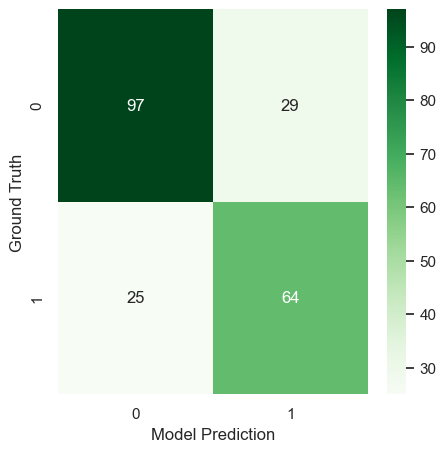

In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

# Step 1: Load the Titanic Dataset
# Assuming you have the dataset as a CSV file named 'titanic.csv'.
df = pd.read_csv('data/titanic.csv')

# Drop rows with missing target or missing important features
df.dropna(subset=['survived', 'age', 'fare'], inplace=True)

# Convert categorical variables to dummy variables (one-hot encoding)
df = pd.get_dummies(df, columns=['sex', 'pclass'], dtype=int, drop_first=True)


features = ['age', 'fare', 'sex_male', 'pclass_2', 'pclass_3']
target = 'survived'

# Step 4: Define Features and Target
X = df[features]  
y = df[target]


# # Step 6: Split the Dataset into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 7: Fit the Logistic Regression Model using Statsmodels
X_train_sm = sm.add_constant(X_train)  # Adding a constant term for intercept
logit_model = sm.Logit(endog=y_train, exog=X_train_sm)
result = logit_model.fit()

# Print the summary of the model
print(result.summary())

# Make Predictions on the Test Set
X_test_sm = sm.add_constant(X_test)  # Adding constant to test data
y_pred_prob = result.predict(X_test_sm)  # Predicting probabilities
y_pred = np.where(y_pred_prob > 0.5, 1, 0)  # Convert probabilities to binary predictions (using 0.5 as threshold)

## EVALUATE 

# ACCURACY
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score: %f" % accuracy)

# F1 ACCURACY
f1 = f1_score(y_test, y_pred)
print("F1 Score: %f" % f1)


# CONFUSION MATRIX
cm = confusion_matrix(y_test, y_pred)
fig = plt.figure(figsize=(5,5))
ax = sns.heatmap(cm, annot=True, cmap='Greens', fmt='g')
plt.ylabel('Ground Truth')
plt.xlabel('Model Prediction');



# Add to our dataframe to interprept 
X_test_sm['y_pred_proba'] = y_pred_prob
X_test_sm['y_pred'] = y_pred
X_test_sm

In [13]:
interpret_statsmodels_logit(result)

Interpretation of Logistic Regression Coefficients:
-------------------------------------------------
Feature: const
  Log-Odds: 4.7716
  Odds Ratio: 118.1032
  Percentage Change in Odds: 11710.32%

Feature: age
  Log-Odds: -0.0460
  Odds Ratio: 0.9551
  Percentage Change in Odds: -4.49%

Feature: fare
  Log-Odds: -0.0058
  Odds Ratio: 0.9942
  Percentage Change in Odds: -0.58%

Feature: sex_male
  Log-Odds: -2.7534
  Odds Ratio: 0.0637
  Percentage Change in Odds: -93.63%

Feature: pclass_2
  Log-Odds: -1.9072
  Odds Ratio: 0.1485
  Percentage Change in Odds: -85.15%

Feature: pclass_3
  Log-Odds: -3.1222
  Odds Ratio: 0.0441
  Percentage Change in Odds: -95.59%



In [14]:
import numpy as np
import pandas as pd

def interpret_logit_model(model):
    """
    Interprets a fitted statsmodels Logit model in simple human terms.
    Prints odds ratios, % change in odds, and 'times more likely' messages.

    Parameters
    ----------
    model : statsmodels.discrete.discrete_model.BinaryResultsWrapper
        The fitted logistic regression model from statsmodels.Logit(...).fit()
    """

    # Extract coefficient summary
    summary_frame = model.summary2().tables[1].copy()
    summary_frame['odds_ratio'] = np.exp(summary_frame['Coef.'])
    summary_frame['pct_change_odds'] = (summary_frame['odds_ratio'] - 1) * 100
    summary_frame['times_more_likely'] = np.where(
        summary_frame['Coef.'] > 0,
        summary_frame['odds_ratio'],
        1 / summary_frame['odds_ratio']
    )

    print("💡 Human-Readable Logistic Regression Interpretation")
    print("---------------------------------------------------")
    print(f"Dependent variable: {model.model.endog_names}\n")

    for var, row in summary_frame.iterrows():
        coef = row['Coef.']
        odds_ratio = row['odds_ratio']
        pct_change = row['pct_change_odds']
        times = row['times_more_likely']
        p_value = row['P>|z|']

        # Skip intercept for simplicity
        if var.lower() in ['const', 'intercept']:
            continue

        direction = "increases" if coef > 0 else "decreases"
        significance = "statistically significant" if p_value < 0.05 else "not statistically significant"

        # Text interpretation
        print(f"🔹 {var}:")
        print(f"   • Coefficient = {coef:.3f} ({significance})")
        print(f"   • Odds Ratio = {odds_ratio:.3f}")
        print(f"   • This means a 1-unit increase in '{var}' {direction} the odds of survival by about {abs(pct_change):.1f}%.")
        
        if coef > 0:
            print(f"   • In other words, someone is about {times:.1f}× more likely to survive if '{var}' increases by 1.\n")
        else:
            print(f"   • In other words, someone is about {times:.1f}× more likely to die if '{var}' increases by 1.\n")

    print("---------------------------------------------------")


In [15]:
interpret_logit_model(result)

💡 Human-Readable Logistic Regression Interpretation
---------------------------------------------------
Dependent variable: survived

🔹 age:
   • Coefficient = -0.046 (statistically significant)
   • Odds Ratio = 0.955
   • This means a 1-unit increase in 'age' decreases the odds of survival by about 4.5%.
   • In other words, someone is about 1.0× more likely to die if 'age' increases by 1.

🔹 fare:
   • Coefficient = -0.006 (not statistically significant)
   • Odds Ratio = 0.994
   • This means a 1-unit increase in 'fare' decreases the odds of survival by about 0.6%.
   • In other words, someone is about 1.0× more likely to die if 'fare' increases by 1.

🔹 sex_male:
   • Coefficient = -2.753 (statistically significant)
   • Odds Ratio = 0.064
   • This means a 1-unit increase in 'sex_male' decreases the odds of survival by about 93.6%.
   • In other words, someone is about 15.7× more likely to die if 'sex_male' increases by 1.

🔹 pclass_2:
   • Coefficient = -1.907 (statistically sig